# Toups Final Project

Simulating the movement of Warbling Babbler from multiple populations to multiple landscapes

- importing the required modules

In [29]:
##########################
#    Author: Ben Toups
#     Date: 5/7/2020
##########################



import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

- setting up the required classes

In [30]:
class individual:
    '''class that constructs an individual (warbling babbler) of a given phenotype that will make up a population'''
    def __init__(self, phenotype):
        self.phenotype = phenotype
    

class population:
    '''class that constructs a population of given size containing a list of individuals'''
    def __init__(self, pheno, size = 10):
        self.pheno = pheno
        self.size = size
        self.indivs = []
        for i in range(size):
            self.indivs.append(individual(phenotype = pheno))
    def countPhenos(self):
        '''counts the phenotype of every individual in the population'''
        red = 0
        green = 0
        brown = 0
        blue = 0
        for i in self.indivs:
            if i.phenotype == "red":
                red += 1
            elif i.phenotype == "green":
                green += 1
            elif i.phenotype == "brown":
                brown += 1
            elif i.phenotype == "blue":
                blue += 1
        phenos = [red,green,brown,blue]
        return phenos
    
    def countPop(self):
        '''Counts population size'''
        return(len(self.indivs))
            
class landscape:
    '''class that defines a singular landscape including the population that inhabits it 
    and the probabilities that a given individuals will migrate to another location'''
    def __init__(self, landID, popSize, probs):
        self.landID = landID
        self.landPop = population(pheno = phenotypeList.pop(), size = popSize)
        self.probs = probs
        
    def migrate(self):
        '''Makes a random selection from the list of landscape objects using the migration probabilities defined by the
        local class. If the lanscape ID of the destination class matches the landscape ID of the local class, no migration happens.
        However, if they are not the same, the list of individuals in the local class is shuffled and an invidual is popped
        from the local class and appended to the list of individuals in the destination class.'''
        dest = np.random.choice(landscapeList, replace = True, p = self.probs)
        if dest.landID == self.landID:
            pass
        elif dest.landID != self.landID:
            if len(self.landPop.indivs) != 0:
                random.shuffle(self.landPop.indivs)
                dest.landPop.indivs.append(self.landPop.indivs.pop())
            else:
                pass
            


- Defining the main migratory function 

In [31]:
def migratePops(gens = 100):
    '''Migrates each population a given amount of time steps and keeps track of the counts of each phenotype in each generation for
    each landscape. Also creates a plot for each landscape.'''
    #Setting up lists for each phenotype in each landscape
    beach_r = []
    beach_g = []
    beach_br = []
    beach_bl = []
    woods_r = []
    woods_g = []
    woods_br = []
    woods_bl = []
    mountains_r = []
    mountains_g = []
    mountains_br = []
    mountains_bl = []
    jungle_r = []
    jungle_g = []
    jungle_br = []
    jungle_bl = []
    
    #Setting up lists for population size for each landscape
    beach_pop = []
    woods_pop = []
    mountains_pop = []
    jungle_pop = []
    
    #Migrating each population for each time step and counting phenotypes at each step
    for i in range(gens):
        for n in landscapeList:
            n.migrate()
        #Recording phenotype counts
        beach_Ps = beach.landPop.countPhenos(); beach_r.append(beach_Ps[0]); beach_g.append(beach_Ps[1])
        beach_br.append(beach_Ps[2]); beach_bl.append(beach_Ps[3])
        woods_Ps = woods.landPop.countPhenos(); woods_r.append(woods_Ps[0]); woods_g.append(woods_Ps[1])
        woods_br.append(woods_Ps[2]); woods_bl.append(woods_Ps[3])
        mountains_Ps = mountains.landPop.countPhenos(); mountains_r.append(mountains_Ps[0])
        mountains_g.append(mountains_Ps[1]); mountains_br.append(mountains_Ps[2]); mountains_bl.append(mountains_Ps[3])
        jungle_Ps = jungle.landPop.countPhenos(); jungle_r.append(jungle_Ps[0]); jungle_g.append(jungle_Ps[1])
        jungle_br.append(jungle_Ps[2]); jungle_bl.append(jungle_Ps[3])
        #Recording population size counts
        beach_pop.append(beach.landPop.countPop())
        woods_pop.append(woods.landPop.countPop())
        mountains_pop.append(mountains.landPop.countPop())
        jungle_pop.append(jungle.landPop.countPop())
        
    #Constructing landscape dataframes at each time step
    beach_df = pd.DataFrame({'time': range(gens), 'beach_r': beach_r, 'beach_g': beach_g, 'beach_br': beach_br,
                             'beach_bl': beach_bl})
    woods_df = pd.DataFrame({'time': range(gens), 'woods_r': woods_r, 'woods_g': woods_g, 'woods_br': woods_br,
                             'woods_bl': woods_bl})
    mountains_df = pd.DataFrame({'time': range(gens), 'mountains_r': mountains_r, 'mountains_g': mountains_g,
                                 'mountains_br': mountains_br, 'mountains_bl': mountains_bl})
    jungle_df = pd.DataFrame({'time': range(gens), 'jungle_r': jungle_r, 'jungle_g': jungle_g, 'jungle_br': jungle_br,
                              'jungle_bl': jungle_bl})
    
    #Creating figure with 4 subplots (one for each landscape)
    fig, ((beachPlot, woodsPlot), (mountainsPlot, junglePlot)) = plt.subplots(2,2) 
    
    #plotting each phenotype for each landscape
    beachPlot.plot('time', 'beach_r', data=beach_df, color = 'r')
    beachPlot.plot('time', 'beach_g', data=beach_df, color = 'g')
    beachPlot.plot('time', 'beach_br', data=beach_df, color = 'saddlebrown')
    beachPlot.plot('time', 'beach_bl', data=beach_df, color = 'b')
    woodsPlot.plot('time', 'woods_r', data=woods_df, color = 'r')
    woodsPlot.plot('time', 'woods_g', data=woods_df, color = 'g')
    woodsPlot.plot('time', 'woods_br', data=woods_df, color = 'saddlebrown')
    woodsPlot.plot('time', 'woods_bl', data=woods_df, color = 'b')
    mountainsPlot.plot('time', 'mountains_r', data=mountains_df, color = 'r')
    mountainsPlot.plot('time', 'mountains_g', data=mountains_df, color = 'g')
    mountainsPlot.plot('time', 'mountains_br', data=mountains_df, color = 'saddlebrown')
    mountainsPlot.plot('time', 'mountains_bl', data=mountains_df, color = 'b')
    junglePlot.plot('time', 'jungle_r', data=jungle_df, color = 'r')
    junglePlot.plot('time', 'jungle_g', data=jungle_df, color = 'g')
    junglePlot.plot('time', 'jungle_br', data=jungle_df, color = 'saddlebrown')
    junglePlot.plot('time', 'jungle_bl', data=jungle_df, color = 'b')
    
    #Setting X limit, Y limit, and titles
    beachPlot.set_xlim([0, gens]); beachPlot.set_ylim([0, pop_size+1]); beachPlot.title.set_text('Beach')
    beachPlot.set(xlabel='Time Steps', ylabel='# of Each Phenotype'); beachPlot.label_outer()
    woodsPlot.set_xlim([0, gens]); woodsPlot.set_ylim([0, pop_size+1]); woodsPlot.title.set_text('Woods')
    woodsPlot.set(xlabel='Time Steps', ylabel='# of Each Phenotype'); woodsPlot.label_outer()
    mountainsPlot.set_xlim([0, gens]); mountainsPlot.set_ylim([0, pop_size+1]); mountainsPlot.title.set_text('Mountains')
    mountainsPlot.set(xlabel='Time Steps', ylabel='# of Each Phenotype'); mountainsPlot.label_outer()
    junglePlot.set_xlim([0, gens]); junglePlot.set_ylim([0, pop_size+1]); junglePlot.title.set_text('Jungle')
    junglePlot.set(xlabel='Time Steps', ylabel='# of Each Phenotype'); junglePlot.label_outer()
    fig.suptitle('Number of Each Phenotype in each Landscape Over Time', y = 1.05)
    fig.tight_layout()
    
    #plotting population count for each landscape, similar to above
    fig2, ((beachPopPlot, woodsPopPlot), (mountainsPopPlot, junglePopPlot)) = plt.subplots(2,2, sharey = True)
    
    beachPopPlot.plot(range(gens), beach_pop); beachPopPlot.title.set_text('Beach')
    beachPopPlot.set(xlabel='Time Steps', ylabel='Population Count'); beachPopPlot.label_outer(); beachPopPlot.set_xlim([0,gens])
    woodsPopPlot.plot(range(gens), woods_pop); woodsPopPlot.title.set_text('Woods')
    woodsPopPlot.set(xlabel='Time Steps', ylabel='Population Count'); woodsPopPlot.label_outer(); woodsPopPlot.set_xlim([0,gens])
    mountainsPopPlot.plot(range(gens), mountains_pop); mountainsPopPlot.title.set_text('Mountains')
    mountainsPopPlot.set(xlabel='Time Steps', ylabel='Population Count'); mountainsPopPlot.label_outer()
    mountainsPopPlot.set_xlim([0,gens])
    junglePopPlot.plot(range(gens), jungle_pop); junglePopPlot.title.set_text('Jungle')
    junglePopPlot.set(xlabel='Time Steps', ylabel='Population Count'); junglePopPlot.label_outer(); junglePopPlot.set_xlim([0,gens])
    fig2.suptitle('Population count in each Landscape Over Time', y = 1.05)
    fig2.tight_layout()

    
    

# Running iterations of the simulation with different starting parameters 

- Small population, symmetrical migration rates

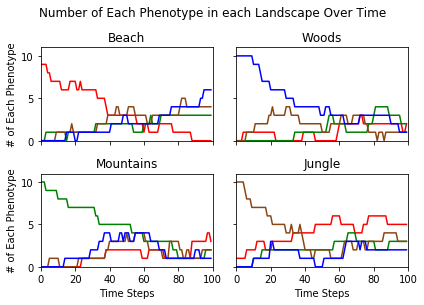

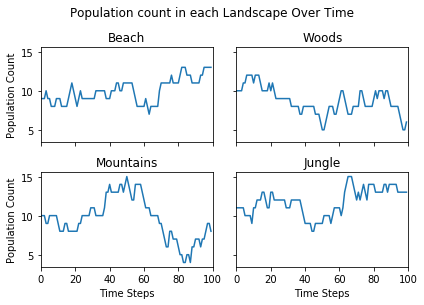

In [32]:
# initializes each landscape with it's corresponding list of migration probabilities, and calling the migration function
phenotypeList = ["red", "green", "blue", "brown"]
random.shuffle(phenotypeList)
pop_size = 10
beach = landscape(landID = 'beach', popSize= pop_size, probs = [0.7,0.1,0.1,0.1])
woods = landscape(landID= 'woods', popSize= pop_size, probs = [0.1,0.7,0.1,0.1])
mountains = landscape(landID = 'mountains', popSize= pop_size, probs = [0.1,0.1,0.7,0.1])
jungle = landscape(landID = 'jungle', popSize= pop_size, probs = [0.1,0.1,0.1,0.7])
landscapeList = [beach, woods, mountains, jungle]
migratePops()

- Large population, symmetrical migration rate

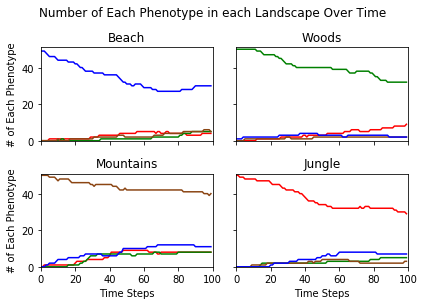

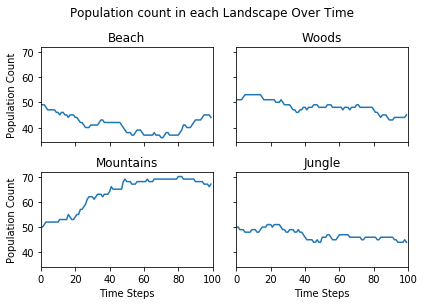

In [33]:
phenotypeList = ["red", "green", "blue", "brown"]
random.shuffle(phenotypeList)
pop_size = 50
beach = landscape(landID = 'beach', popSize= pop_size, probs = [0.7,0.1,0.1,0.1])
woods = landscape(landID= 'woods', popSize= pop_size, probs = [0.1,0.7,0.1,0.1])
mountains = landscape(landID = 'mountains', popSize= pop_size, probs = [0.1,0.1,0.7,0.1])
jungle = landscape(landID = 'jungle', popSize= pop_size, probs = [0.1,0.1,0.1,0.7])
landscapeList = [beach, woods, mountains, jungle]
migratePops(gens=100)

- Large population, higher migration

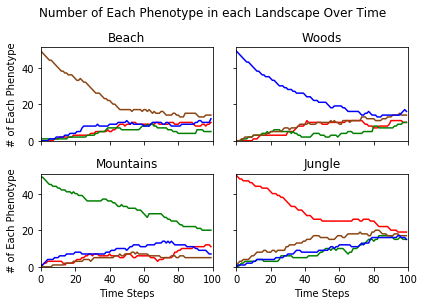

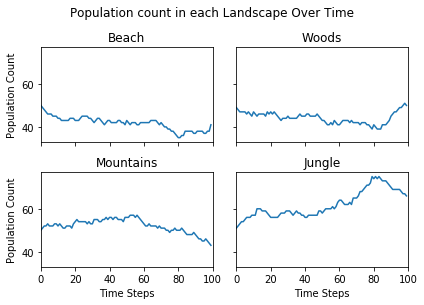

In [34]:
phenotypeList = ["red", "green", "blue", "brown"]
random.shuffle(phenotypeList)
pop_size = 50
beach = landscape(landID = 'beach', popSize= pop_size, probs = [0.25,0.25,0.25,0.25])
woods = landscape(landID= 'woods', popSize= pop_size, probs = [0.25,0.25,0.25,0.25])
mountains = landscape(landID = 'mountains', popSize= pop_size, probs = [0.25,0.25,0.25,0.25])
jungle = landscape(landID = 'jungle', popSize= pop_size, probs = [0.25,0.25,0.25,0.25])
landscapeList = [beach, woods, mountains, jungle]
migratePops(gens=100)

- Large population, asymmetric migration rates

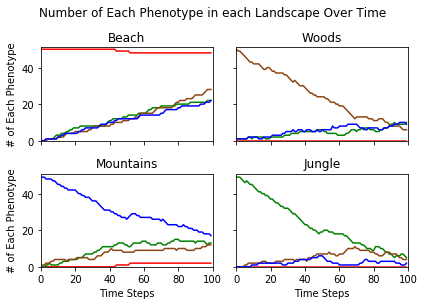

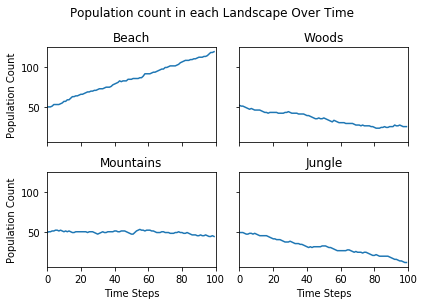

In [35]:
phenotypeList = ["red", "green", "blue", "brown"]
random.shuffle(phenotypeList)
pop_size = 50
beach = landscape(landID = 'beach', popSize= pop_size, probs = [0.97,0.01,0.01,0.01])
woods = landscape(landID= 'woods', popSize= pop_size, probs = [0.25,0.25,0.25,0.25])
mountains = landscape(landID = 'mountains', popSize= pop_size, probs = [0.25,0.25,0.25,0.25])
jungle = landscape(landID = 'jungle', popSize= pop_size, probs = [0.25,0.25,0.25,0.25])
landscapeList = [beach, woods, mountains, jungle]
migratePops(gens=100)

# Questions

- As individuals move, the phenotype counts in each population seem to even out and progress towards a sort of dynamic equilibrium. 

- As the rate of movement is increased, that dynamic phenotype equilirbium seems to be reached much more quickly. 

- When migration rates are asymmetric, population counts quickly become unequal as a majority of individuals begin moving to one population and rarely leave.

- With larger population sizes, the dynamics phenotype equilibrium takes much longer to reach, whereas small population sizes seem to reach it much more quickly.